<a href="https://colab.research.google.com/github/sweta96/GoogleColab/blob/master/malaria(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd /content/gdrive/My\ Drive/Dataset
!ls

/content/gdrive/My Drive/Dataset
catanddog  Genderclassifier.csv  malaria  model.h5  winequality_red.csv


In [0]:
malaria='/content/gdrive/My Drive/Dataset/malaria'
IMG_SIZE = 64,64

In [0]:
image_names = []
data_labels = []
data_images = []

In [0]:
import cv2
import os
import tensorflow as tf

def  create_data(DIR):
     for folder in os.listdir(DIR):
        for file in os.listdir(os.path.join(DIR,folder)):
            if file.endswith("png"):
                image_names.append(os.path.join(DIR,folder,file))
                data_labels.append(folder)
                img = cv2.imread(os.path.join(DIR,folder,file))
                im = cv2.resize(img,IMG_SIZE)
                data_images.append(im)
            else:
                continue

In [0]:
create_data(malaria)

In [0]:
import numpy as np

data = np.array(data_images)

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
label = le.fit_transform(data_labels)

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.20,random_state=42)

print("X_train shape",x_train.shape)
print("X_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (22075, 64, 64, 3)
X_test shape (5519, 64, 64, 3)
y_train shape (22075,)
y_test shape (5519,)


In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

classifier=Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim= 128, activation='relu'))
classifier.add(Dense(output_dim= 1, activation='sigmoid'))
classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_datagen.fit(x_train)

In [0]:
history=classifier.fit_generator(
    train_datagen.flow(x_train,y_train, batch_size=64),
    steps_per_epoch =5000,
    epochs = 5,
    verbose = 1,
    validation_data = (x_test,y_test),
    validation_steps = 64)

Epoch 1/5
5000/5000 [==============================] - 304s 61ms/step - loss: 0.0558 - acc: 0.9814 - val_loss: 2.3852 - val_acc: 0.8509
Epoch 2/5
5000/5000 [==============================] - 302s 60ms/step - loss: 0.0552 - acc: 0.9818 - val_loss: 2.5974 - val_acc: 0.8378
Epoch 3/5
5000/5000 [==============================] - 302s 60ms/step - loss: 0.0542 - acc: 0.9821 - val_loss: 2.2885 - val_acc: 0.8570
Epoch 4/5
5000/5000 [==============================] - 300s 60ms/step - loss: 0.0537 - acc: 0.9821 - val_loss: 1.9993 - val_acc: 0.8752
Epoch 5/5
5000/5000 [==============================] - 304s 61ms/step - loss: 0.0515 - acc: 0.9829 - val_loss: 2.4011 - val_acc: 0.8500


In [0]:
classifier.save_weights('model.h5')

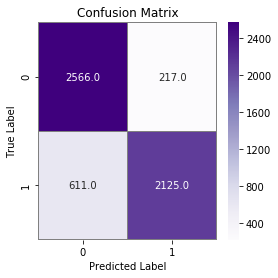

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = classifier.predict_classes(x_test)
cm = confusion_matrix(y_test,pred)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [0]:
accuracy=(cm[0][0]+cm[1][1])/len(y_test)
print(accuracy)

0.8499728211632542
